# Time-depth conversion

Can't decide whether to have a `VelocityModel` class &mdash; probably a subclass of `np.ndarray` I guess &mdash; or whether to just assume something like that exists (i.e. that the velocity model is perfect) and focus on the conversion function. Probably that's better... then the mechanics of making sure the velocity model is legit can go into a class later.

In [1]:
import bruges

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data model

In [2]:
class VelocityModel(object):
    # Subclass ndarray
    # Check that it goes to t = 0
    # Let people choose whether it's defined in time or depth
    # Let people choose whether it's defined with Vint, Vrms, Vavg, or time-depth pairs
    # Instantiate from SEGY or from ASCII
    # 1D, 2D or 3D
    pass

## Conversion function

Requirements:

  - Should 'just work' with any number of dimensions.
  - Should be able to convert a single depth or time.
  - Should be able to get time-depth table.
  - Should work on continuous or point data.
  - Data and model should be able to have different bases.
  - Should be independent of units.

We'll start with 1D...

In [3]:
v1d = np.array([1600, 2000, 2500, 2400, 2600, 2600])

In [4]:
basis = 0.5

In [5]:
basis = np.array([0.   , 0.002, 0.004, 0.006, 0.008, 0.010 ])

In [6]:
basis = np.array([0.   , 0.001, 0.002])

In [7]:
def _get_basis(a, basis):
    a = np.asanyarray(a, dtype=np.float)
    t_len = a.shape[-1]
    if np.size(basis) == t_len:
        t = basis
        # Check that intervals are all the same.
    elif np.size(basis) == 1:
        t_end = basis * (t_len - 1)
        t = np.linspace(0, t_end, t_len)
    else:
        raise ValueError("The basis must give the time or depth for all samples, or be a scalar")
    dt = t[1] - t[0]
    return t, dt

In [8]:
_get_basis(v1d, 1)

(array([0., 1., 2., 3., 4., 5.]), 1.0)

In [9]:
domain = 'time'  # Domain of the model.

In [10]:
np.repeat(v1d, 3)

array([1600, 1600, 1600, 2000, 2000, 2000, 2500, 2500, 2500, 2400, 2400,
       2400, 2600, 2600, 2600, 2600, 2600, 2600])

In [11]:
def subsample(arr, d0, dnew):
    r = int(d0 / dnew)
    return np.repeat(arr, r)

In [12]:
subsample(v1d, 1, 0.15)

array([1600, 1600, 1600, 1600, 1600, 1600, 2000, 2000, 2000, 2000, 2000,
       2000, 2500, 2500, 2500, 2500, 2500, 2500, 2400, 2400, 2400, 2400,
       2400, 2400, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600, 2600,
       2600, 2600, 2600])

In [13]:
def time_to_depth(data, v, basis, domain, basis_out):
    pass

In [14]:
def convert(x, x_basis, v, v_basis, y_basis):
    time, dt = _get_basis(v, v_basis)
    time = np.concatenate([time, [time[-1] + dt]])
    depth = dt * np.concatenate([[0], np.cumsum(v)])
    v_avg = depth / time
    v_avg[0] = v_avg[1]
    print("V_avg", v_avg)
    return

In [15]:
time, dt = _get_basis(v, v_basis)
time = np.concatenate([time, [time[-1] + dt]])
depth = dt * np.concatenate([[0], np.cumsum(v)])
v_avg = depth / time
v_avg[0] = v_avg[1]
print("V_avg", v_avg)


NameError: name 'v' is not defined

In [105]:
convert(None, None, v1d, 1, None)

V_avg [1600.         1600.         1800.         2033.33333333 2125.
 2220.         2283.33333333]


/home/matt/anaconda3/envs/bruges/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [81]:
v1d

array([1600, 2000, 2500, 2400, 2600, 2600])

In [66]:
v1d

array([1600, 2000, 2500, 2400, 2600, 2600])

In [54]:
np.cumsum(v1d)

array([ 1600,  3600,  6100,  8500, 11100, 13700])

In [51]:
t

array([0., 1., 2., 3., 4., 5.])

In [71]:
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10])

## Do this all with `xarray`

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

z   = [1000, 1400, 1600, 1800, 2000, 2200, 2800, 3000, 3200, 3400]
velocity = [1486, 2000, 2500, 2400, 2600, 2600, 4580, 4580, 2800, 3200]

v1d = np.array(velocity)
v1d = xr.DataArray(v1d,
                   name='velocity',
                   dims=['depth'],
                   coords=[z],
                  )

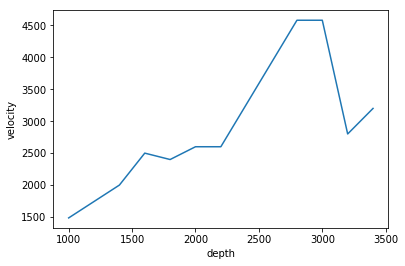

In [21]:
v1d.plot()

In [33]:
v2d = np.tile(v1d, 100).reshape(-1, 10)
v2d = xr.DataArray(v2d,
                   name='velocity',
                   dims=['x', 'depth'],
                   coords=[np.linspace(1000, 2000, 100), z],
                  )

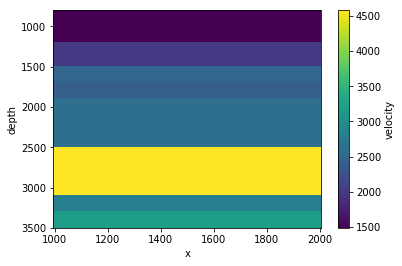

In [39]:
fig, ax = plt.subplots()
v2d.T.plot()
ax.invert_yaxis()